In [81]:
import pandas as pd
import numpy as np

laptop_df = pd.read_csv('data/amazon_laptop_prices_v01.csv') 
print(laptop_df)

      brand                   model   screen_size       color harddisk  \
0      ROKC                     NaN     14 Inches        Blue  1000 GB   
1        HP                     NaN   15.6 Inches      Silver  1000 GB   
2       MSI   Vector GP66 12UGS-267  15.66 Inches  Core Black      NaN   
3     Apple             MacBook Air   13.3 Inches      Silver   256 GB   
4     Apple             MacBook Air   15.3 Inches    Midnight   256 GB   
...     ...                     ...           ...         ...      ...   
4441    MSI  Stealth GS66 12UGS-025   15.6 Inches  Core Black      NaN   
4442   ROKC                     NaN     14 Inches        Blue  1000 GB   
4443   Dell    Inspiron 3511 Laptop   15.6 Inches       Black   512 GB   
4444   Dell    Latitude 3420 Laptop     14 Inches         NaN   512 GB   
4445   Dell    Latitude 5430 Laptop     14 Inches       Black   256 GB   

                cpu    ram               OS  special_features    graphics  \
0     Intel Core i7   8 GB       W

In [82]:
# Transform numbers as strings into integers/floats
def screen_convert(screen_str):
    if pd.isna(screen_str):
        return screen_str
    elif 'Inches' in screen_str:
        screen_str = screen_str.replace(' Inches', '')
        return float(screen_str)
    elif 'TB' in screen_str:
        screen_str = screen_str.replace(' TB', '')
        return (float(screen_str) * 1000)
    elif 'GB' in screen_str:
        screen_str = screen_str.replace(' GB', '')
        return float(screen_str)
    elif 'MB' in screen_str:
        screen_str = screen_str.replace(' MB', '')
        return (float(screen_str) / 1000)
    elif '$' in screen_str:
        screen_str = screen_str.replace('$', '')
        screen_str = screen_str.replace(',', '')
        return float(screen_str)
    else: 
        return float(screen_str)
# def harddisk_convert(harddisk_str):
#     if pd.isna(harddisk_str):
#         return harddisk_str
#     elif 'TB' in harddisk_str:
#         harddisk_str = harddisk_str.replace(' TB', '')
#         return (int(harddisk_str) * 1000)
#     elif 'GB' in harddisk_str:
#         harddisk_str = harddisk_str.replace(' GB', '')
#         return int(harddisk_str)
#     elif 'MB' in harddisk_str:
#         harddisk_str = harddisk_str.replace(' MB', '')
#         return (int(harddisk_str) / 1000)
#     else: 
#         return float(harddisk_str)
def cpu_convert(cpu_str):
    if pd.isna(cpu_str):
        return cpu_str
    elif ',' in cpu_str: 
        return None
    elif 'GHz' in cpu_str:
        cpu_str = cpu_str.replace(' GHz', '')
        return float(cpu_str)
    elif 'MHz' in cpu_str:
        cpu_str = cpu_str.replace(' MHz', '')
        return (float(cpu_str) / 1000)
    elif 'Hz' in cpu_str:
        cpu_str = cpu_str.replace(' Hz', '')
        return (float(cpu_str) / 1000000000)
    else: 
        return float(cpu_str)

laptop_df['screen_size'] = laptop_df['screen_size'].apply(screen_convert)
laptop_df['harddisk'] = laptop_df['harddisk'].apply(screen_convert)
laptop_df['ram'] = laptop_df['ram'].apply(screen_convert)
#laptop_df['cpu_speed'] = laptop_df['cpu_speed'].apply(cpu_convert)
laptop_df['price'] = laptop_df['price'].apply(screen_convert)
laptop_df


,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14.00,Blue,1000.0,Intel Core i7,8.0,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,589.99
1,HP,NaN,15.60,Silver,1000.0,Intel Core i5,64.0,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,999.99
2,MSI,Vector GP66 12UGS-267,15.66,Core Black,NaN,Intel Core i9,32.0,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,1599.00
3,Apple,MacBook Air,13.30,Silver,256.0,Unknown,8.0,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,689.99
4,Apple,MacBook Air,15.30,Midnight,256.0,Unknown,8.0,Mac OS,NaN,Integrated,NaN,NaN,4.8,1144.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,MSI,Stealth GS66 12UGS-025,15.60,Core Black,NaN,Intel Core i9,32.0,Windows 11 Home,NaN,Dedicated,NVIDIA GeForce RTX 3070,1.8 GHz,1.0,1699.00
4442,ROKC,NaN,14.00,Blue,1000.0,Intel Core i7,8.0,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,589.99
4443,Dell,Inspiron 3511 Laptop,15.60,Black,512.0,Core i3,8.0,Windows 10 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,591.99
4444,Dell,Latitude 3420 Laptop,14.00,NaN,512.0,Core i5,8.0,Windows 10 Pro,NaN,Integrated,Intel Integrated Graphics,0.9 GHz,NaN,1771.99


In [83]:
# EDA
print(laptop_df)
print(laptop_df.shape)

print(laptop_df.dtypes)

      brand                   model  screen_size       color  harddisk  \
0      ROKC                     NaN        14.00        Blue    1000.0   
1        HP                     NaN        15.60      Silver    1000.0   
2       MSI   Vector GP66 12UGS-267        15.66  Core Black       NaN   
3     Apple             MacBook Air        13.30      Silver     256.0   
4     Apple             MacBook Air        15.30    Midnight     256.0   
...     ...                     ...          ...         ...       ...   
4441    MSI  Stealth GS66 12UGS-025        15.60  Core Black       NaN   
4442   ROKC                     NaN        14.00        Blue    1000.0   
4443   Dell    Inspiron 3511 Laptop        15.60       Black     512.0   
4444   Dell    Latitude 3420 Laptop        14.00         NaN     512.0   
4445   Dell    Latitude 5430 Laptop        14.00       Black     256.0   

                cpu   ram               OS  special_features    graphics  \
0     Intel Core i7   8.0       Win

In [84]:
#Target Variable

print(laptop_df['price'].describe())

count     4441.000000
mean      1189.330016
std        826.022711
min         57.990000
25%        589.990000
50%        999.990000
75%       1612.990000
max      11261.240000
Name: price, dtype: float64


66


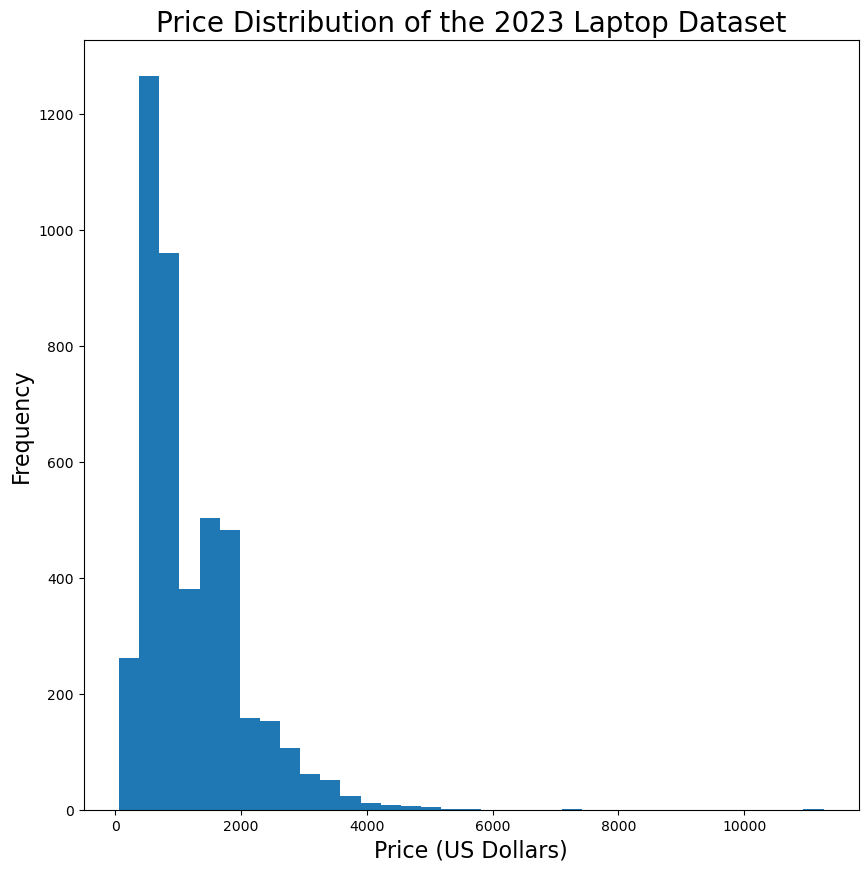

In [85]:
from matplotlib import pylab as plt
print(int(np.sqrt(laptop_df.shape[0])))
plt.figure(figsize=(10,10))
plt.hist(laptop_df['price'], bins = 35)
plt.xlabel('Price (US Dollars)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Price Distribution of the 2023 Laptop Dataset', fontsize=20)
plt.show()

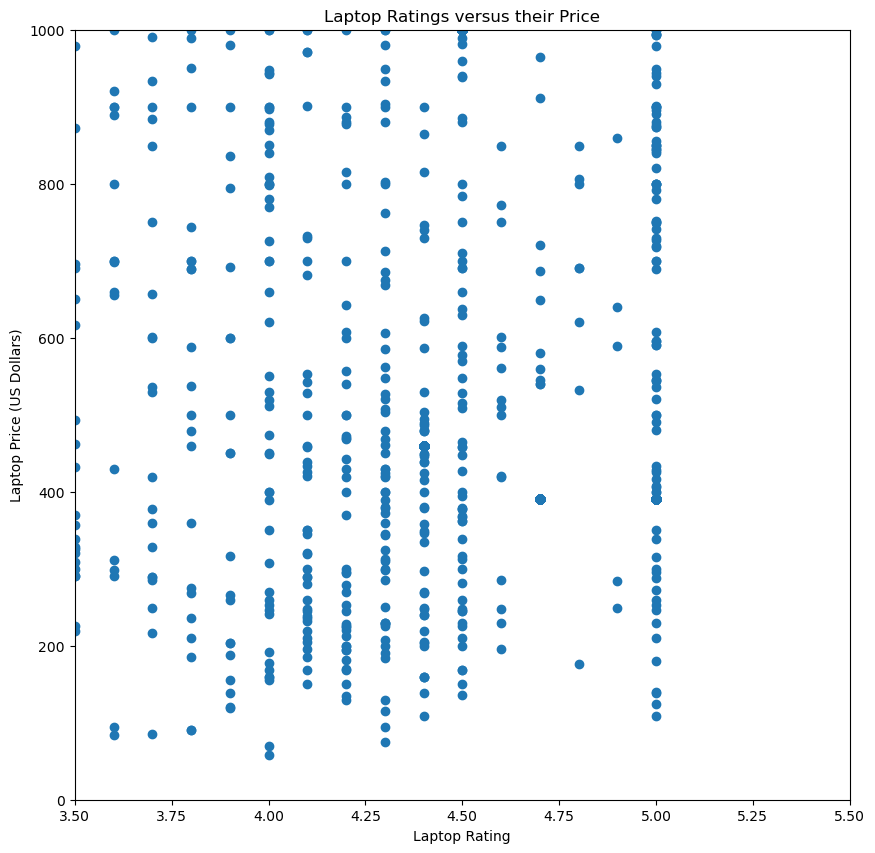

In [86]:
# Visualizations
plt.figure(figsize=(10,10))
plt.scatter(laptop_df['rating'], laptop_df['price'])
plt.xlim(3.5, 5.5)
plt.ylim(0,1000)
plt.xlabel('Laptop Rating')
plt.ylabel('Laptop Price (US Dollars)')
plt.title('Laptop Ratings versus their Price')
plt.show()

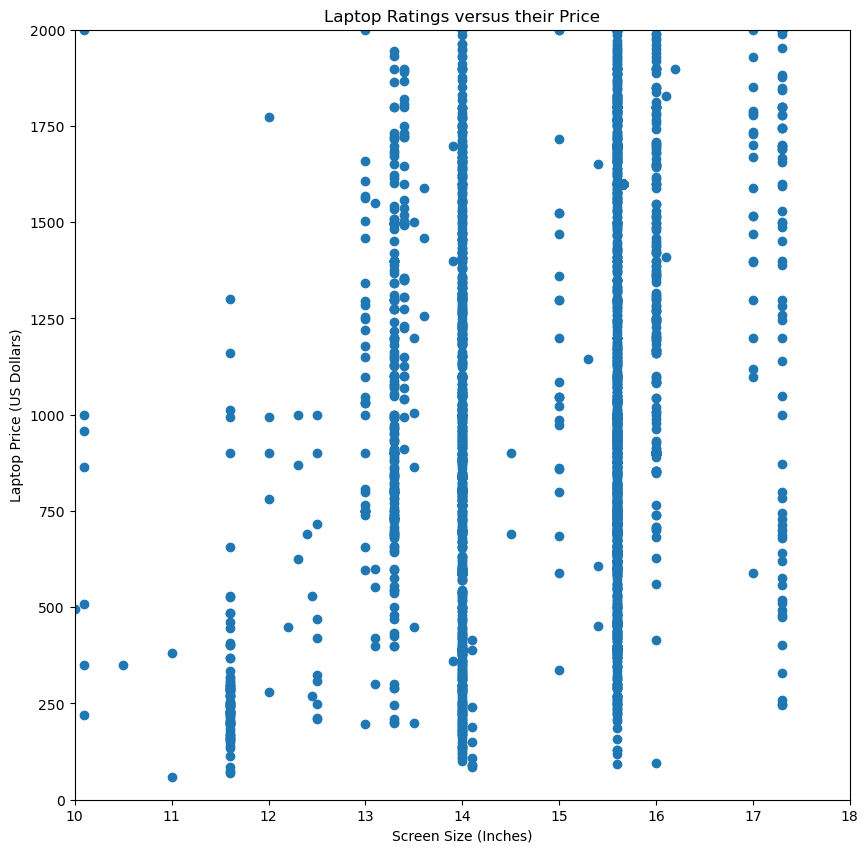

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(laptop_df['screen_size'], laptop_df['price'])
plt.xlim(10, 18)
plt.ylim(0,2000)
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Laptop Price (US Dollars)')
plt.title('Laptop Ratings versus their Price')
plt.show()

61
ram
16.000     1344
32.000     1092
8.000       791
64.000      502
20.000      331
4.000       216
12.000       40
24.000       21
40.000       13
48.000       12
2.000         9
1.000         4
128.000       3
6.000         3
0.064         1
5.000         1
96.000        1
31.990        1
Name: count, dtype: int64


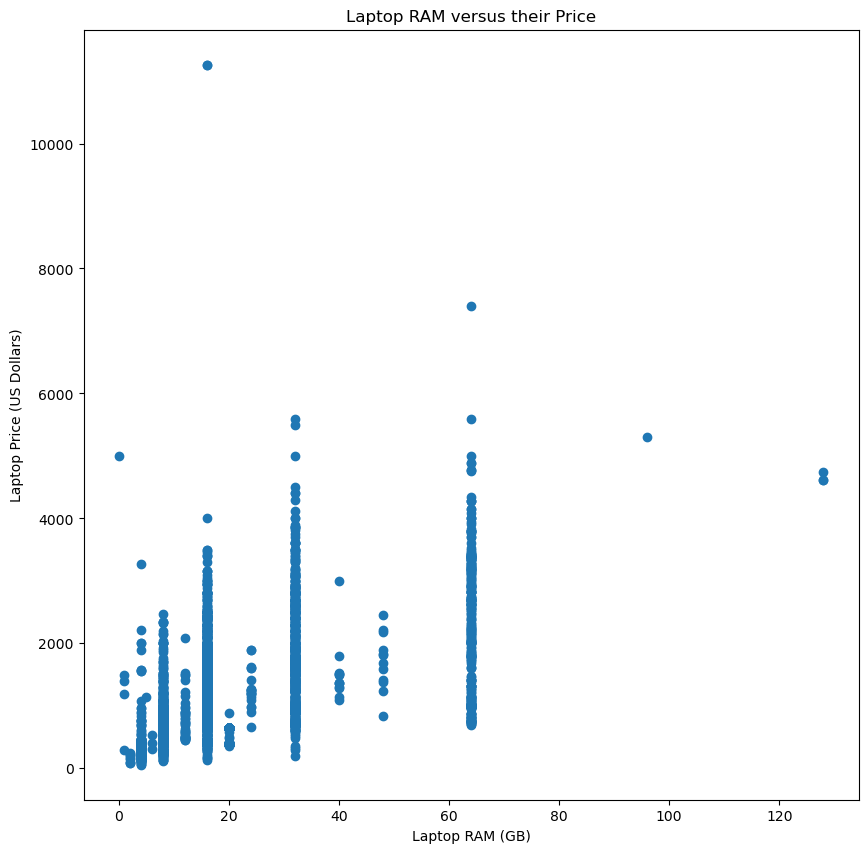

In [88]:
plt.figure(figsize=(10,10))
print(laptop_df['ram'].isna().sum())
print(laptop_df['ram'].value_counts())
plt.scatter(laptop_df['ram'], laptop_df['price'])
plt.xlabel('Laptop RAM (GB)')
plt.ylabel('Laptop Price (US Dollars)')
plt.title('Laptop RAM versus their Price')
plt.show()

color
Black              1172
Silver              717
Blue                507
Core Black          393
Gray                230
                   ... 
Graphite Gray         1
Titan Gray Dull       1
Indigo Blue           1
Platinum Titan        1
Abyssal Black         1
Name: count, Length: 187, dtype: int64


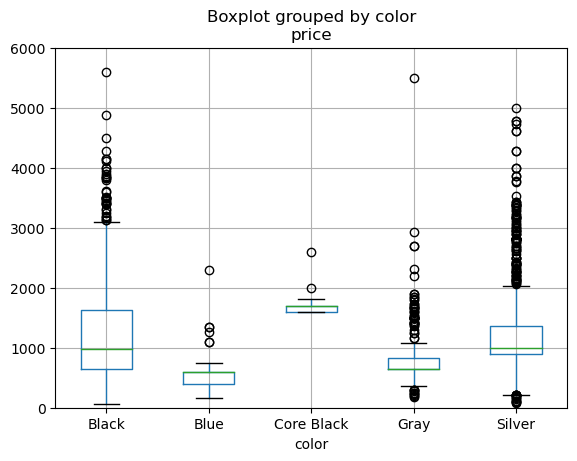

In [89]:
print(laptop_df['color'].value_counts())
modified_df = laptop_df[laptop_df['color'].isin(laptop_df['color'].value_counts().head(5).index)]
modified_df.boxplot(column='price', by='color')
plt.ylim(0,6000)
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# top_brands = laptop_df['brand'].value_counts().index[:20]  # Select the top 'n' most frequent brands
# laptop_df['brand'] = laptop_df['brand'].apply(lambda x: x if x in top_brands else 'Other')

# print(laptop_df['model'].value_counts())
X = laptop_df.drop('price', axis=1)
y = laptop_df['price']
random_state=42

X_other, X_test_pre, y_other, y_test = train_test_split(X, y, train_size = 0.8, random_state=random_state)

X_train_pre, X_val_pre, y_train, y_val = train_test_split(X_other, y_other, train_size=0.75, random_state = random_state)

print(X_train_pre.shape)
print(X_val_pre.shape)
print(X_test_pre.shape)

cat_ftrs=['brand', 'model', 'color', 'cpu', 'OS', 'special_features', 'graphics', 'graphics_coprocessor', 'cpu_speed']
cont_ftrs = ['screen_size', 'harddisk', 'ram', 'rating']

preprocessor = ColumnTransformer(
  transformers = [
       ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_ftrs), 
       ('cont', StandardScaler(), cont_ftrs)])

pre = Pipeline(steps= [('preprocessor', preprocessor)])

X_train = pre.fit_transform(X_train_pre)
X_val = pre.transform(X_val_pre)
X_test = pre.transform(X_test_pre)

# features = pre.get_feature_names_out()

# X_preprocess = pd.DataFrame(X_train, columns=features)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2667, 13)
(889, 13)
(890, 13)
(2667, 1467)
(889, 1467)
(890, 1467)
